In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [119]:
df = pd.read_csv('digit-recognizer//train.csv')
df.head()                                      

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [120]:
df.shape

(42000, 785)

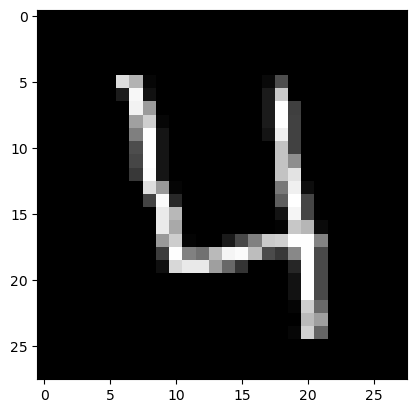

In [121]:
plt.imshow(df.iloc[3,1:].values.reshape(28,28), cmap='gray')

In [122]:
x= df.iloc[:,1:]    
y= df.iloc[:,0]

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [124]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)   

KNeighborsClassifier()

In [125]:
x_test = x_test.to_numpy()


In [126]:
import time
start= time.time()
y_pred = knn.predict(x_test)
print(time.time()-start)

c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


6.467500686645508


In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9678571428571429

In [128]:
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [129]:
pca= PCA(n_components= 50)
x_train1= pca.fit_transform(x_train)
x_test1= pca.transform(x_test) 

In [130]:
x_train1.shape

(33600, 50)

In [131]:
knn= KNeighborsClassifier()
knn.fit(x_train1, y_train)  
start= time.time()
y_pred = knn.predict(x_test1)
print(time.time()-start)

0.2700817584991455


In [132]:
accuracy_score(y_test, y_pred)

0.9553571428571429

In [133]:
for i in range(1,784):
    pca= PCA(n_components= i)
    x_train_t= pca.fit_transform(x_train)
    x_test_t= pca.transform(x_test)
    knn= KNeighborsClassifier()
    knn.fit(x_train_t, y_train)
    y_pred = knn.predict(x_test_t)
    print(i, accuracy_score(y_test, y_pred)) 

1 0.25345238095238093
2 0.32857142857142857
3 0.5176190476190476
4 0.6654761904761904
5 0.7336904761904762
6 0.8253571428571429
7 0.8419047619047619
8 0.8726190476190476
9 0.8844047619047619
10 0.9073809523809524
11 0.9141666666666667
12 0.919047619047619
13 0.9280952380952381
14 0.9336904761904762
15 0.9354761904761905
16 0.9377380952380953
17 0.9392857142857143
18 0.94
19 0.9454761904761905
20 0.9451190476190476
21 0.9451190476190476
22 0.9447619047619048
23 0.9466666666666667
24 0.9469047619047619
25 0.9484523809523809
26 0.9473809523809524
27 0.9483333333333334
28 0.9482142857142857
29 0.9497619047619048
30 0.9489285714285715
31 0.9491666666666667
32 0.9502380952380952
33 0.9496428571428571
34 0.9519047619047619
35 0.9532142857142857
36 0.9539285714285715
37 0.9545238095238096
38 0.9557142857142857
39 0.954047619047619
40 0.9545238095238096
41 0.9566666666666667
42 0.9558333333333333
43 0.9560714285714286
44 0.955595238095238
45 0.9566666666666667
46 0.9547619047619048
47 0.9544047

KeyboardInterrupt: 

## Visualization importance of pca

### 2-d

In [135]:
pca= PCA(n_components= 2)
x_train2=pca.fit_transform(x_train)
x_test2=pca.fit_transform(x_test)

In [139]:
import  plotly.express as px
y_train_s= y_train.astype(str)
fig = px.scatter(x_train2, x=0, y=1, color=y_train,color_discrete_sequence=px.colors.qualitative.G10, title='PCA on MNIST') 
fig.show()

### 3-d

In [137]:
pca= PCA(n_components= 3)
x_train3=pca.fit_transform(x_train)
x_test3=pca.fit_transform(x_test)

In [151]:
color_palette = px.colors.qualitative.Set3
fig = px.scatter_3d(x_train3, x=0, y=1, z=2, color=y_train, title='PCA on MNIST')
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0, pad=0)
)
fig.show()

In [152]:
pca.explained_variance_

array([41.13176076, 29.34161727, 27.73624504])

In [154]:
pca.components_

array([[ 1.31121412e-18,  6.68670551e-18,  1.89017287e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.11947349e-17,  6.13062495e-17,  2.13419875e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.57953029e-16, -1.43039117e-17,  5.14868644e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [156]:
pca= PCA(n_components= 784)
x_train4=pca.fit_transform(x_train)
x_test4=pca.fit_transform(x_test)

print(pca.explained_variance_.shape)
print(pca.components_.shape)

(784,)
(784, 784)


177


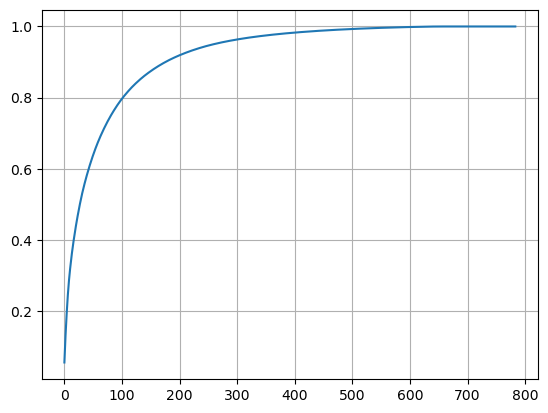

In [165]:
cumulative_variance=np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance)
n_components_90_percent = np.argmax(cumulative_variance >= 0.9) + 1
print(n_components_90_percent)
plt.grid(True)
plt.show()

#### So 177 is the best value of pca components 